# Lab 4
The goal of this practical is to investigate the logistic regression model. This is broken down into four parts:
- [Part A](#Part-A:-Investigating-line-search): investigating line search as a method for optimising black box functions
- [Part B](PartB.ipynb): applying Newton's method and steepest descent as optimisation methods for two-dimensional functions
- [Part C](PartC.ipynb): using the same optimisation methods for fitting a logistic regression model to simple 2D data
- [Part D](PartD.ipynb): implementing the logistic regression model for face detection by using a binary classifier on image data

# Part A: Investigating line search
Look through the code to understand the goal of this part, and then fill in the 'TO DO' sections - starting with implementing the ['`line_search`'](#Optimisation-procedure) method 

### Import modules

In [11]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
plt.style.use('machinevision.mplstyle')
from numpy import arange, array, exp, sin
from scipy.optimize import fmin

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define functions to optimise
You can think of each of these functions as being a 'black box'

In [13]:
def my_function(x):
    if x < 0:
        return -x
    elif x > 1:
        return -sin((1 * 1.8)**2) + x - 1
    else:
        return -sin((x * 1.8)**2)


def my_function2(x):
    if x < 0:
        return -x - exp(-0.5 * (-0.2 / 0.025)**2)
    elif x > 1:
        return -sin((1 * 1.8)**2) + x - 1
    else:
        return -sin((x * 1.8)**2) - exp(-0.5 * ((x - 0.2) / 0.025)**2)

# Optimisation procedure

In [14]:
def line_search(function, start, end, tolerance):
    a = start
    d = end

    while (d - a) > tolerance:
        print('Current Search Region is {:6.6f} to {:6.6f}'.format(a, d))
        # TO DO - Implement a line search iteration:
        #
        # step 1: Remove the break above
        # step 2: Calculate intermediate positions b and c, 1/3 and 2/3 of the way through interval
        #         (between a and d), respectively
        b = a + (d - a) / 3
        c = a + 2 * (d - a) / 3
        # step 3:  Evaluate function at points b and c
        f_b = function(b)
        f_c = function(c)
        # step 4:  Update point a or d depending on the values of those evaluations
        if f_b < f_c:
            d = c
        else:
            a = b

    return a, function(a)

# Construct data

In [15]:
function = my_function

x = arange(0, 1, step=0.01)
w = array([function(x_i) for x_i in x])

# Perform optimisation

### Line search

In [5]:
min_x, min_value = line_search(function, start=0, end=1, tolerance=1e-4)

Current Search Region is 0.000000 to 1.000000
Current Search Region is 0.333333 to 1.000000
Current Search Region is 0.555556 to 1.000000
Current Search Region is 0.555556 to 0.851852
Current Search Region is 0.555556 to 0.753086
Current Search Region is 0.621399 to 0.753086
Current Search Region is 0.665295 to 0.753086
Current Search Region is 0.665295 to 0.723823
Current Search Region is 0.684804 to 0.723823
Current Search Region is 0.684804 to 0.710816
Current Search Region is 0.684804 to 0.702146
Current Search Region is 0.690585 to 0.702146
Current Search Region is 0.690585 to 0.698292
Current Search Region is 0.693154 to 0.698292
Current Search Region is 0.694867 to 0.698292
Current Search Region is 0.694867 to 0.697150
Current Search Region is 0.695628 to 0.697150
Current Search Region is 0.695628 to 0.696643
Current Search Region is 0.695966 to 0.696643
Current Search Region is 0.695966 to 0.696417
Current Search Region is 0.696116 to 0.696417
Current Search Region is 0.696217 

### SciPy optimisation
There is a SciPy method that can do this optimisation for you given a function.

**TO DO:** Look up the help page for the function `fmin`, you can also try `?fmin` in a new jupyter cell to get an information about functions.

In [7]:
?fmin

Signature:
fmin(
    func,
    x0,
    args=(),
    xtol=0.0001,
    ftol=0.0001,
    maxiter=None,
    maxfun=None,
    full_output=0,
    disp=1,
    retall=0,
    callback=None,
    initial_simplex=None,
)
Docstring:
Minimize a function using the downhill simplex algorithm.

This algorithm only uses function values, not derivatives or second
derivatives.

Parameters
----------
func : callable func(x,*args)
    The objective function to be minimized.
x0 : ndarray
    Initial guess.
args : tuple, optional
    Extra arguments passed to func, i.e., ``f(x,*args)``.
xtol : float, optional
    Absolute error in xopt between iterations that is acceptable for
    convergence.
ftol : number, optional
    Absolute error in func(xopt) between iterations that is acceptable for
    convergence.
maxiter : int, optional
    Maximum number of iterations to perform.
maxfun : number, optional
    Maximum number of function evaluations to make.
full_output : bool, optional
    Set to True if fopt and w

In [6]:
scipy_min_x = fmin(function, x0=0, xtol=1e-4)
scipy_min_value = function(scipy_min_x)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 24
         Function evaluations: 48


# Visualise results
If everything is working correctly the optimised `x` from the line search and the result from `fmin` should coincide, and appear to be at the function's minimum

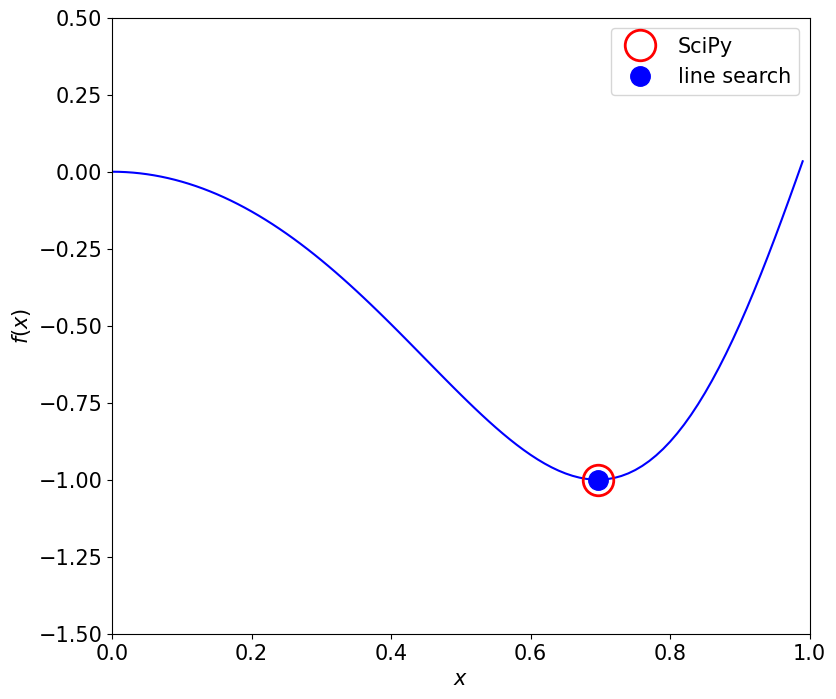

In [10]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(x, w, 'b-')
ax.plot(scipy_min_x, scipy_min_value, 'ro', markeredgewidth=2, markersize=22, label='SciPy')
ax.plot(min_x, min_value, 'bo', fillstyle='full', label='line search')

ax.set(xlabel='$x$', ylabel='$f(x)$', xlim=[0, 1], ylim=[-1.5, 0.5])
plt.legend();

## TO DO
### Repeat the process for `myfunction2`
Try using different initialisations in order to find the *global* minimum

Current Search Region is 0.124555 to 0.384118
Current Search Region is 0.124555 to 0.297597
Current Search Region is 0.124555 to 0.239916
Current Search Region is 0.163009 to 0.239916
Current Search Region is 0.163009 to 0.214281
Current Search Region is 0.180100 to 0.214281
Current Search Region is 0.191493 to 0.214281
Current Search Region is 0.191493 to 0.206685
Current Search Region is 0.196557 to 0.206685
Current Search Region is 0.196557 to 0.203309
Current Search Region is 0.198808 to 0.203309
Current Search Region is 0.198808 to 0.201809
Current Search Region is 0.199808 to 0.201809
Current Search Region is 0.199808 to 0.201142
Current Search Region is 0.200253 to 0.201142
Current Search Region is 0.200549 to 0.201142
Current Search Region is 0.200549 to 0.200944
Current Search Region is 0.200681 to 0.200944
Current Search Region is 0.200681 to 0.200856
Current Search Region is 0.200739 to 0.200856
Optimization terminated successfully.
         Current function value: -1.129756

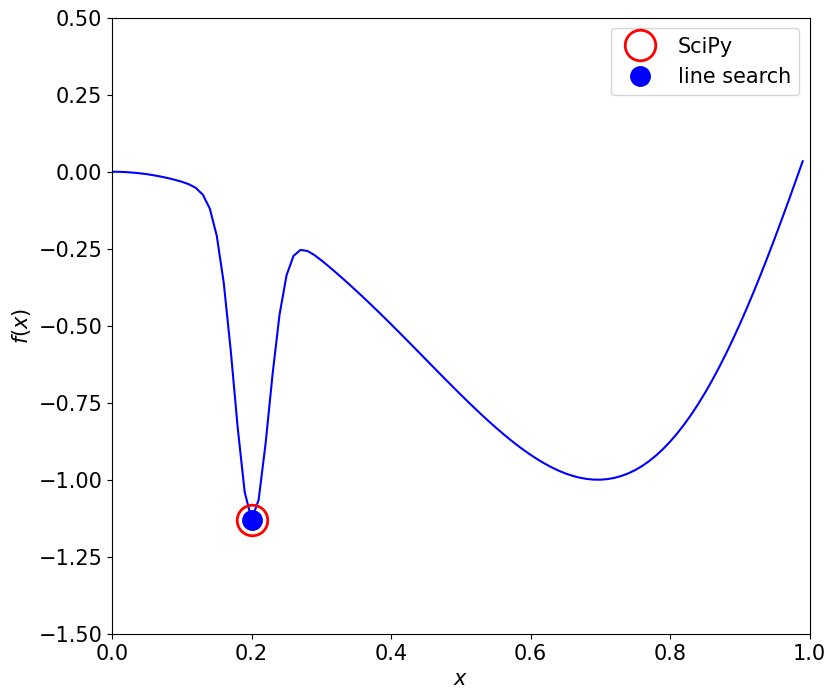

In [30]:
import random
function = my_function2

x = arange(0, 1, step=0.01)
w = array([function(x_i) for x_i in x])

start_pos = random.random()
end_pos = random.uniform(start_pos, 1.0)
min_x, min_value = line_search(function, start=start_pos, end=end_pos, tolerance=1e-4)
scipy_min_x = fmin(function, x0=0, xtol=1e-4)
scipy_min_value = function(scipy_min_x)

fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(x, w, 'b-')
ax.plot(scipy_min_x, scipy_min_value, 'ro', markeredgewidth=2, markersize=22, label='SciPy')
ax.plot(min_x, min_value, 'bo', fillstyle='full', label='line search')

ax.set(xlabel='$x$', ylabel='$f(x)$', xlim=[0, 1], ylim=[-1.5, 0.5])
plt.legend()